In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load cifar10 dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape) #print  dataset shape

(50000, 32, 32, 3)


In [3]:
accur = [] # defining accuracy array

for k in range(1, 21): #lopping for k=20 times
  print("k: ", k)
  accuracy = []
  for f in range(5): 
    # five folds defining
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    
    cm = ce = 0         

    for i in range(len(validationX)): #declaring  range for validation
      man_distance = []
      euc_distance = []

    #declaring the range for trainX
      for j in range(len(trainX)):
        # calculate l1 distance
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        # calculate l2 distance
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
      values = man_distance[:k, 1]
      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cm += 1
         # for euclidean distance
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

      # print(man_distance[0][0], man_distance[-1][0])
      # print(euc_distance[0], euc_distance[-1])

      if i == 200:
        break

    accuracy.append([cm/100, ce/100])
  accur.append([accuracy, k])

print(accur)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.37, 0.28], [0.39, 0.33], [0.32, 0.26], [0.41, 0.28], [0.26, 0.29]], 1], [[[0.32, 0.2], [0.32, 0.35], [0.33, 0.28], [0.33, 0.35], [0.34, 0.26]], 2], [[[0.39, 0.23], [0.39, 0.29], [0.32, 0.3], [0.38, 0.3], [0.33, 0.28]], 3], [[[0.33, 0.25], [0.4, 0.4], [0.28, 0.29], [0.31, 0.35], [0.33, 0.31]], 4], [[[0.28, 0.24], [0.36, 0.37], [0.35, 0.26], [0.32, 0.33], [0.31, 0.31]], 5], [[[0.3, 0.25], [0.41, 0.33], [0.36, 0.29], [0.36, 0.28], [0.34, 0.33]], 6], [[[0.34, 0.31], [0.47, 0.39], [0.34, 0.27], [0.37, 0.31], [0.38, 0.37]], 7], [[[0.36, 0.32], [0.47, 0.34], [0.38, 0.29], [0.33, 0.36], [0.36, 0.39]], 8], [[[0.34, 0.3], [0.48, 0.34], [0.35, 0.3], [0.32, 0.36], [0.37, 0.41]], 9], [[[0.34, 0.28], [0.43, 0.35], [0.37, 0.29], [0.37, 0.41], [0.39, 0.43]], 10], [[[0.35, 0.26], [0.42, 0.3], [0.37, 0.33], [0.32, 0.45], [0.39, 0.41]], 11], [[[0.33, 0.26], [0.41, 0.33]

C:\Users\Refat\AppData\Local\Temp/ipykernel_17228/781238028.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  k = np.array(accur)[:,1]


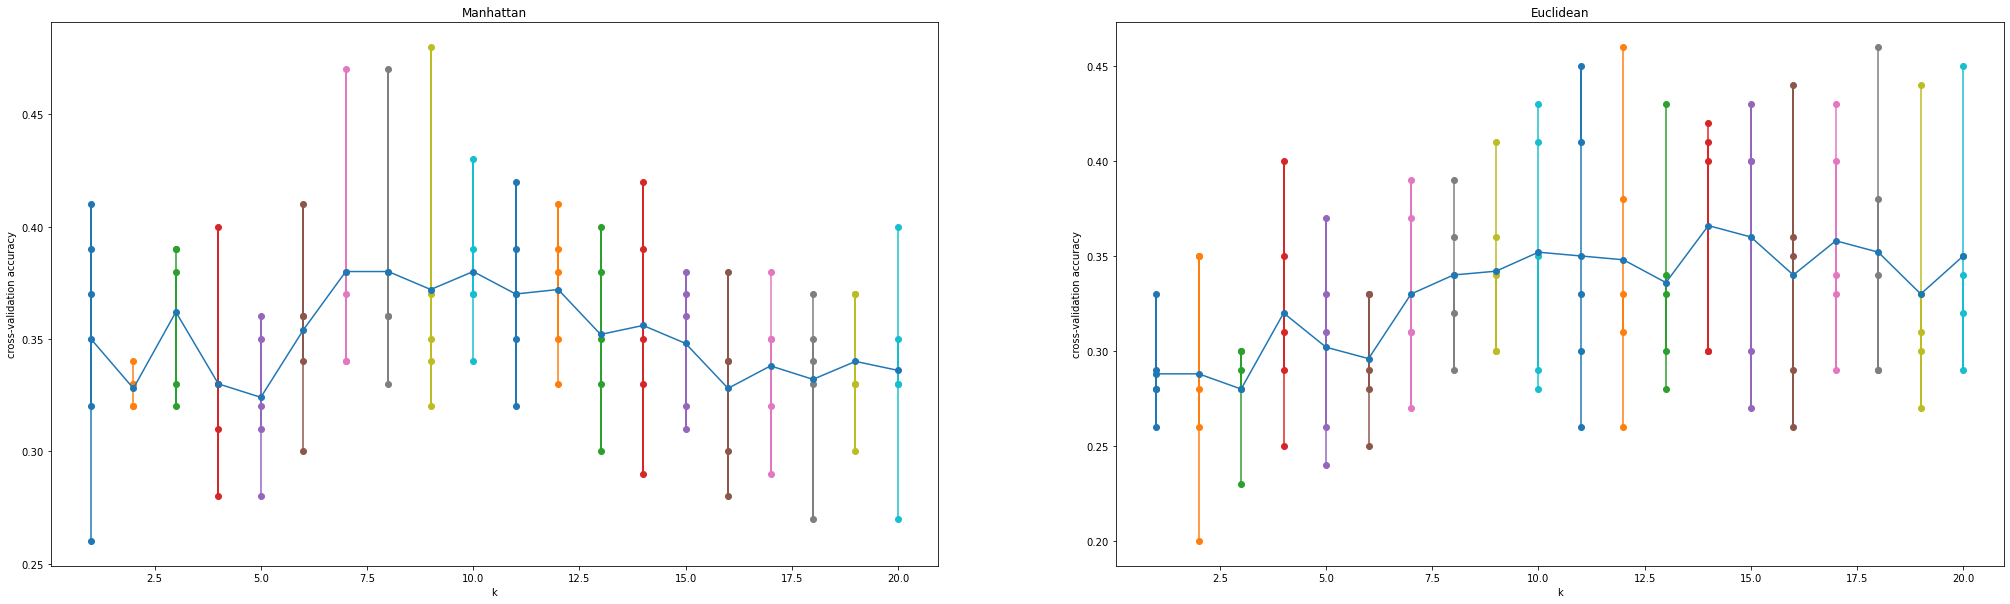

In [5]:
a1 = []
a2 = []
k = np.array(accur)[:,1]

plt.figure(figsize=(35,10)) #defining figure size
plt.subplot(1,2,1) #defining subplot
plt.title('Manhattan') 
for i in range(len(accur)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accur[i][0])[:,0] #defining manhattan accuracy
  a1.append(np.average(l1))
  plt.plot(a, l1, 'o-') #ploting the graph
  
plt.plot(k, a1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2) #defining subplot
plt.title('Euclidean') #printing the title
for i in range(len(accur)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accur[i][0])[:,1] #defining euclidean accuracy
  a2.append(np.average(l2))
  plt.plot(a, l2, 'o-') #ploting the graph

plt.plot(k, a2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')
# visualizing the cross validation accuracy between l1 and l2 distances for k values
plt.show() 